# Drug rasterplots
-----

Notebook for rasterplot examples on fused organoid. 

The following figures can be found here:
>1. Extended data 8m.

**load libraries**

In [1]:
import os

os.chdir('../..')

from fused_org_ephys import FusedOrgSpikes, rasterplot_drugs

!pwd

/Users/michael.zabolocki/Desktop/code/fusion_models_ephys


**load spike times**

Load mua spike times using the ```FusedOrgSpikes``` class. See the following notebook for analysis details [here](https://github.com/mzabolocki/miscos_ephys/blob/main/analysis/mua_spikes/mua_spikes.ipynb). 

In [2]:
spikes_drugapp = FusedOrgSpikes(spikearr_fpath = 'Data/DR022_2023-05-15_20-52-41.pkl')

loading Data/DR022_2023-05-15_20-52-41.pkl


## **Extended data 8m:** drug opto rasterplots
----

Example rasterplot with optogenetic stimulation for silicon probe recordings in striatal organoids, and optogenetic stimulation in ventral midbrain. Synaptic cocktail blocker cocktail applied to determine functional innervation.

Filter for active channels.

In [3]:
stim_length = 10*60

baseline_opto_start = spikes_drugapp.metadata['1_syncmessage_time'].values[0]

print(f'baseline opto start: {baseline_opto_start}')

spikes_drugapp.set_activechannels(spk_activechan_interval = [baseline_opto_start, baseline_opto_start+stim_length], spk_count_thresh = 50)

baseline opto start: 600.0
filter channels with >= 5.0 spks/min | time interval [600.0, 1200.0] seconds


Set opto stimulation at baseline periods only. 

In [4]:
train_dur = stim_length # length of optogenetic stimulus
interval = 10 # pulse interval in ms
dur = 0.5 # pulse duration in ms

baseline_opto_start = spikes_drugapp.metadata['1_syncmessage_time'].values[0]
spikes_drugapp.set_baseline_optostim(start=baseline_opto_start, train_dur=train_dur, interval=interval, dur=dur)

Set drug opto times. 

In [5]:
train_dur = stim_length # length of optogenetic stimulus
interval = 10 # pulse interval in ms
dur = 0.5 # pulse duration in ms

drug_opto_start = spikes_drugapp.metadata['4_syncmessage_time'].values[0]
spikes_drugapp.set_drug_optostim(start=drug_opto_start, train_dur=train_dur, interval=interval, dur=dur)

Set network events. 

In [6]:
spikes_drugapp.set_network_event

generating network event vector using active channels


Set crop as +/- 100 seconds from start of optogenetic stimulus for the rasterplot.

In [7]:
baseline_crop = [baseline_opto_start-100, baseline_opto_start+100]

Raster plot at baseline, with optogenetic stimulation, and stimulation + synaptic blockers. 

Synaptic blockers include: AP5, Gabazeine (GZ), CNQX, DR1 + DR2 inhibitors. A full outline of the concentrations can be found in the paper methods. 

The new directory is created for figures/supp_figures/
saving to: figures/supp_figures/DR22_drugapplication_rasterplot.pdf
saved


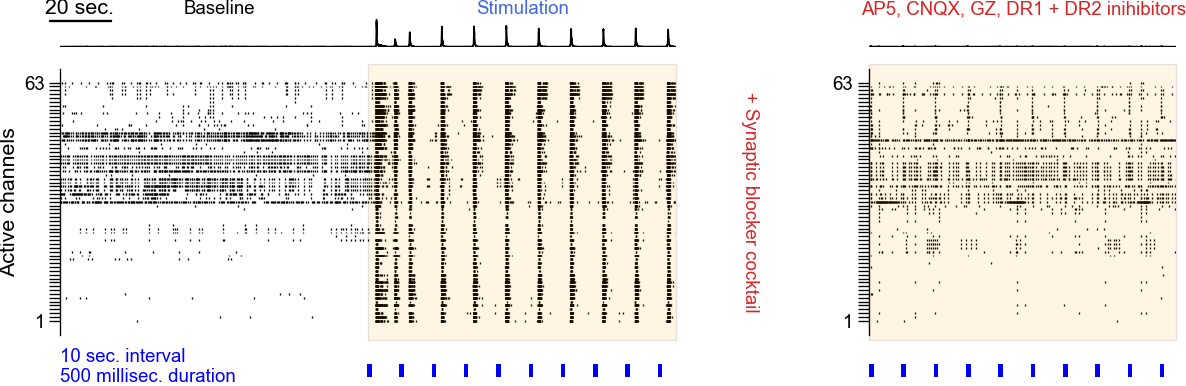

In [8]:
# saving details
save_folder = 'figures/supp_figures/'
fname = 'DR22_drugapplication_rasterplot'

# plot generation
rasterplot_drugs(mua_spikes=spikes_drugapp.active_chans_mua_spikes, network_events=spikes_drugapp.network_events,
                 drug_optostim_times=spikes_drugapp.drug_optostim_times, optostim_times=spikes_drugapp.baseline_optostim_times,
                 srate=spikes_drugapp.srate, baseline_crop=baseline_crop, baseline_opto_start=baseline_opto_start,
                 drug_opto_start=drug_opto_start, save_folder=save_folder, fname=fname, file_extension='.pdf')